## 1.1 回归

回归问题属于有监督学习，其主要的任务是探寻与分析变量之间的关系。回归的问题多用来预测一个具体的数值，比如未来放假，电量使用情况，销售额等等。对数据进行建模的流程主要是：  

    1、选择模型（如linear regression）
    2、导入训练集  
    3、选择合适的优化算法，通过训练集合中的大量输入输出结果不断的优化输入与输出数据之间的关系  
    4、让训练好的模型预测结果  
    

In [2]:
# 引入相关科学计算包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [4]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X, columns=features)
boston_data['Price'] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**特征解释：**  
   
    CRIM：各城镇的人均犯罪率
    ZN：规划地段超过25,000平方英尺的住宅用地比例  
    INDUS：城镇非零售商业用地比例  
    CHAS：是否在查尔斯河边(=1是)  
    NOX：一氧化氮浓度(/千万分之一)  
    RM：每个住宅的平均房间数  
    AGE：1940年以前建造的自住房屋的比例  
    DIS：到波士顿五个就业中心的加权距离  
    RAD：放射状公路的可达性指数  
    TAX：全部价值的房产税率(每1万美元)  
    PTRATIO：按城镇分配的学生与教师比例  
    B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例  
    LSTAT：较低地位人口  
    Price：房价

#### 绘制散点图我们可以知道房子价格和NOX（一氧化氮浓度）的关系

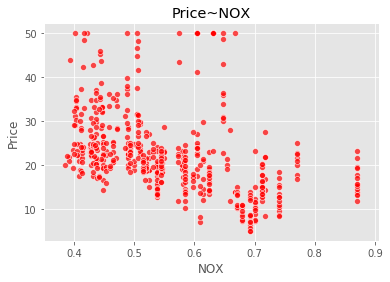

In [19]:
sns.scatterplot(boston_data['NOX'], boston_data['Price'], color='r', alpha=0.7) # alpha调整点的透明度
plt.title('Price~NOX')
plt.show()

可以看出这两者之间的关系并不明显

## 1.2 分类

分类方法是一种对离散型随机变量建模或预测的监督学习算法，其主要任务是对给定样本划分到离散的归属类别中。

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
iris_data = pd.DataFrame(X, columns=features)
iris_data['target'] = y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**特征解释：**

    sepal length (cm)：花萼长度(厘米)  
    sepal width (cm)：花萼宽度(厘米)  
    petal length (cm)：花瓣长度(厘米)  
    petal width (cm)：花瓣宽度(厘米)

做一些特征可视化，观察花萼长宽与样本label的关系

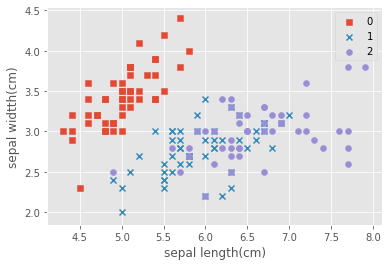

In [28]:
marker = ['s', 'x', 'o']
for index, c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c, 'sepal length (cm)'], y=iris_data.loc[y==c, 'sepal width (cm)'], alpha=1,label=c,marker=marker[c])
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal widtth(cm)')
plt.legend()
plt.show()
    

## 1.3 无监督学习

顾名思义，无监督学习相对于有监督学习区别在于‘监督’二字。有监督学习是利用训练集合的样本label一步步学习得到参数，而无监督学习则是通过计算样本之间的距离来给样本分类。


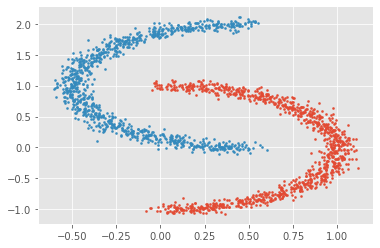

In [41]:
# 生成月牙型非凸集
from sklearn import datasets
x, y = datasets.make_moons(n_samples=2000, shuffle=True,
                  noise=0.05, random_state=None)
for index, c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,1],x[y==c,0],s=4)
plt.show()

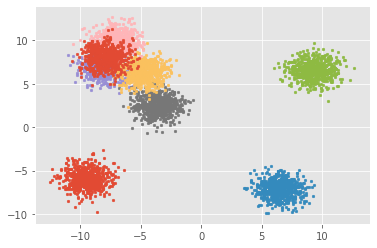

In [45]:
# 生成符合正态分布的聚类数据
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=5000, n_features=3, centers=8)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c, 0], x[y==c, 1],s=7)
plt.show()

由这两个例子可以知道，有时候无监督学习的样本需要自己定义聚类的中心dian